Von Pascal Schlaak, Tim Weise - Natural Language Processing

# Verarbeitung mehrerer Daten

In diesem Notebook soll auf der Analyse eines spezifischen Films aufgebaut werden, indem die Verarbeitung aller gecrawlten Filmdaten untersucht wird. Hierfür bietet es sich an zuerst einen generellen Überblick aller Daten zu verschaffen.

## Module importieren

Als erstes werden wieder einmal alle nötigen Module importiert.
* TODO: Packages beschreiben

In [54]:
import json
import spacy
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

## Einlesen der Daten
Im folgenden können nun alle Daten eingelesen werden. Wir nutzen hierfür die Funktionalität des Moduls `Pandas`, welches sich für die Analyse von Daten eignet. Mithilfe von `pd.read_json()` kann der Inhalt der JSON-Datei in ein Pandas Dataframe überführt werden.

In [3]:
# Pfad zu JSON-Datei
PATH_TO_DATA = '../data/raw.json'
# Einlesen der JSON-Datei in Dictionary
data = pd.read_json(PATH_TO_DATA)

Für eine spätere Transformation mithilfe von Machine Learning bietet sich eine große Menge an Trainingsdaten an. Über die Länge des Dictionarys können wir ausgeben, wie viele Filmeinträge gecrawlt wurden.

In [4]:
number_movies = len(data)
number_movies

4

Diese Anzahl bietet uns eine solide Datenbasis für kommende Verarbeitungsschritte. Neben der Anzahl an Filmeinträgen ist eine höhere Anzahl von Wörtern pro Zusammenfassung ebenfalls von Vorteil, da man somit mehr Informationen über einen bestimmten Film hat. Im Folgenden wird die gesamte Anzahl an Wörtern pro Zusammenfassung mit der effektiv für die Transformation nutzbaren Anzahl an Wörtern verglichen. Dieser Vergleich bietet uns Einblicke in den Verlust von Wörtern wie beispielsweise Stoppwörtern, welche kein nützliches Wissen für die Analyse des Filminhaltes darstellen.

## Analyse der gesamten Rohdaten

Es soll zunächst untersucht werden, wie hoch die mittlere Anzahl an Wörtern, sowie Maxima des gesamten Datensatzes sind. Hierzu untersuchen wir zuerst die gesamte Anzahl an Wörtern inklusive Stoppwörtern. Es werden lediglich die Satzzeichen entfernt. `spaCy` bietet sich wiederrum für eine Tokenisierung der Zusammenfassungen an.

### Gesamte Anzahl an Wörtern

In [23]:
counters = []
# Laden des Sprach-Supports für spätere Analysen wie POS-Tagging
nlp = spacy.load("en_core_web_sm")
# Iteriere über jeden Film in Daten
for index, movie in data.iterrows():
    # Berechnen der Anzahl an Wörtern
    counters.append({'Titel': movie['title'], 'Token': len([token.text for token in nlp(movie['synopsis']) if not token.is_punct])})
total_number_words = pd.DataFrame(counters)

In [24]:
total_number_words

,Titel,Token
0,Godfellas,1698
1,Casino,2903
2,The Lord of the Rings: The Fellowship of the Ring,1012
3,The Hobbit: An Unexpected Journey,2229


Die Länge einer Liste, welche alle lemmatisierten Tokens enthält, enthält Informationen zur Berechnung der mittleren Anzahl an Wörtern, sowie Identifizierung von minimaler- und maximaler Anzahl an Wörtern einer Zusammenfassung.

In [45]:
# Durchschnittliche Anzahl an Wörtern berechnen
total_average_words = round(sum(total_number_words['Token']) / number_movies)
print('Durschnitt:\t{} Wörter'.format(total_average_words))
# Minimale Anzahl an Wörter finden und dessen Filmnamen ausgeben
title_min_total, value_min_total = total_number_words.min()
print('Minimal:\t{} Wörter\tbei\t{}'.format(value_min_total, title_min_total))
# Maximale Anzahl an Wörter finden und dessen Filmnamen ausgeben
title_max_total, value_max_total = total_number_words.max()
print('Minimal:\t{} Wörter\tbei\t{}'.format(value_max_total, title_max_total))

Durschnitt:	1960 Wörter
Minimal:	1012 Wörter	bei	Casino
Minimal:	2903 Wörter	bei	The Lord of the Rings: The Fellowship of the Ring


### Varianz der Daten

Die Varianz unserer Daten könnte ebenfalls interessant sein, um die Streuung der Anzahl an Wörtern pro Zusammenfassung einordnen zu können. Eine Berechnung erfolgt mithilfe von `Numpy`.

In [46]:
np.std(list(total_number_words['Token']))

694.4344821507642

## Analyse der gesamten vorverarbeitenden Daten

Nachdem wir nun einen generellen Überblick unseres gesamten Datensatzes generiert haben, sollen alle Daten auf die für eine Analyse benötigten Daten reduziert werden. Konkret werden ebenfalls neben allen Satzzeichen auch alle Stoppwörter entfernt und die Grundformen der Wörter gebildet. Generell verfahren wir analog zur vorherigen Analyse.

In [47]:
counters = []
# Iteriere über jeden Film in Daten
for index, movie in data.iterrows():
    # Berechnen der Anzahl an Wörtern
    counters.append({'Titel': movie['title'], 'Token': len([token.text for token in nlp(movie['synopsis']) if not token.ent_type_ and not token.is_punct and not token.is_stop])})
reduced_number_words = pd.DataFrame(counters)

In [48]:
reduced_number_words

,Titel,Token
0,Godfellas,624
1,Casino,999
2,The Lord of the Rings: The Fellowship of the Ring,335
3,The Hobbit: An Unexpected Journey,903


In [49]:
# Durchschnittliche Anzahl an Wörtern berechnen
reduced_average_words = round(sum(reduced_number_words['Token']) / number_movies)
print('Durschnitt:\t{} Wörter'.format(reduced_average_words))
# Minimale Anzahl an Wörter finden und dessen Filmnamen ausgeben
title_min_reduced, value_min_reduced = reduced_number_words.min()
print('Minimal:\t{} Wörter\tbei\t{}'.format(value_min_reduced, title_min_reduced))
# Maximale Anzahl an Wörter finden und dessen Filmnamen ausgeben
title_max_reduced, value_max_reduced = reduced_number_words.max()
print('Minimal:\t{} Wörter\tbei\t{}'.format(value_max_reduced, title_max_reduced))

Durschnitt:	715 Wörter
Minimal:	335 Wörter	bei	Casino
Minimal:	999 Wörter	bei	The Lord of the Rings: The Fellowship of the Ring


Stoppwörter machen somit den folgenden Anteil an den gecrawlten Zusammenfassungen aus:

In [50]:
print('~{} %'.format(round((reduced_average_words / total_average_words) * 100, 0)))

~36.0 %


Eine logische Folgerung der Reduzierung unserer Daten, um Stoppwörter, ist die Verringerung der Varianz der Token. Wir können hierfür die Standardabweichung unserer reduzierten Daten bilden.

In [52]:
np.std(list(reduced_number_words['Token']))

259.1721194496044

## Worthäufigkeit ohne Eigennamen und Stoppwörter

In [56]:
total_words_without_ents, total_entities = [], []
for index, movie in data.iterrows():
    # Generierung einer Liste von allen lemmatisierten Tokens
    total_words_without_ents.extend([token.lemma_ for token in nlp(movie['synopsis']) if not token.ent_type_ and not token.is_stop and not token.is_punct])
    # Generierung einer Liste aller Eigennamen
    total_entities.extend([token.text for token in nlp(movie['synopsis']).ents])

In [61]:
# Häufigesten 30 Wörter identifizieren
common_words = dict(Counter(total_words_without_ents).most_common(20))

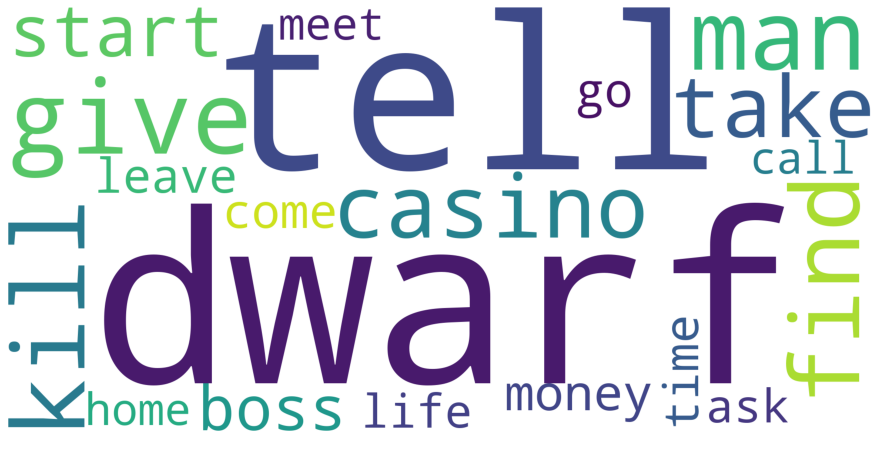

In [62]:
word_cloud = WordCloud(background_color="white", width=2000, height=1000,).generate_from_frequencies(common_words)
plt.rcParams["figure.figsize"] = (16, 8)
plt.axis("off")
plt.imshow(word_cloud)

## Worthäufigkeit der Eigennamen

Nachdem nun generelle Informationen zu den Filminhalten erstellt wurden, können ebenso auch Eigennamen verarbeitet werden. Dies könnte interessant sein, um gängige Rollennamen, Spielorte, Jahr oder Schauspieler identifizieren zu können. In weiteren Analysen könnte beispielsweise versucht werden, die Wahrscheinlichkeit für das Genre eines Films basierend auf dessen Rollen zu bestimmen.

In [63]:
# Häufigesten 30 Wörter identifizieren
common_entities = dict(Counter(total_entities).most_common(20))

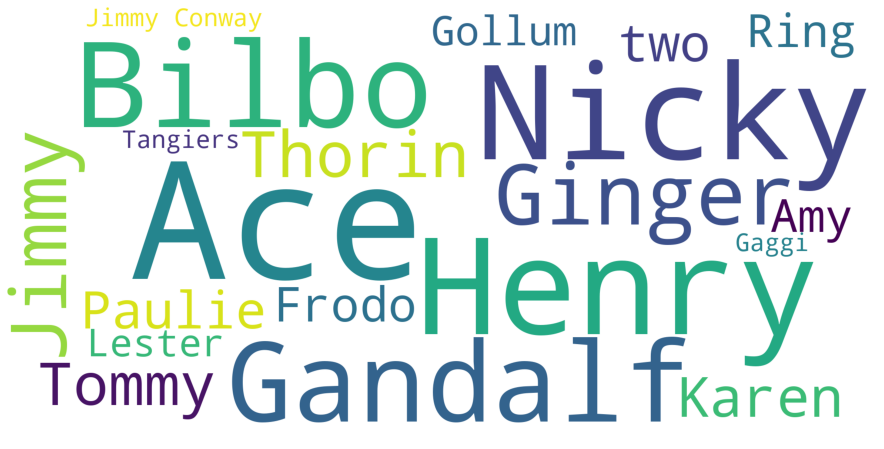

In [64]:
word_cloud = WordCloud(background_color="white", width=2000, height=1000,).generate_from_frequencies(common_entities)
plt.rcParams["figure.figsize"] = (16, 8)
plt.axis("off")
plt.imshow(word_cloud)

### Fazit

Wir konnten mehrere Informationen aus den gecrawlten Filmzusammenfassungen von IMDb ableiten und generell zeigen, dass eine Verarbeitung aller Daten möglich ist. 

Im folgenden Notebook soll untersucht werden, ob eine gute Transformation, basierend auf diesen Daten, möglich ist.